In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from prettytable import PrettyTable

In [2]:
df = pd.read_csv("cleaned_data_with_categorical_variables.csv")

In [3]:
df.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDEXPRG,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,...,LBXMCHSI,LBXRDW,LBXPLTSI,LBXMPSI,LBXFER,Survey_Year,Anemia_status,ID_status,IDA_status,IDA_Status
0,109264.0,2.0,13.0,0,4.5,45.6,6.2,46.4,1.4,0.5,...,28.4,13.1,263.0,8.2,15.7,2017-2020,Non-Anemic,Non-ID,Non-IDA,0
1,109265.0,1.0,2.0,0,9.5,46.4,10.9,39.2,2.9,0.7,...,27.9,13.1,286.0,6.6,42.1,2017-2020,Non-Anemic,Non-ID,Non-IDA,0
2,109266.0,2.0,29.0,0,7.8,34.5,6.0,58.3,0.8,0.5,...,28.1,14.0,314.0,6.9,11.6,2017-2020,Non-Anemic,ID,Non-IDA,0
3,109269.0,1.0,2.0,0,9.1,38.3,7.8,48.8,4.1,1.1,...,27.8,13.4,287.0,6.9,41.7,2017-2020,Non-Anemic,Non-ID,Non-IDA,0
4,109271.0,1.0,49.0,0,5.5,32.2,8.3,54.8,3.8,1.0,...,33.5,13.7,254.0,7.1,196.0,2017-2020,Non-Anemic,Non-ID,Non-IDA,0


In [4]:
df.columns

Index(['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDEXPRG', 'LBXWBCSI', 'LBXLYPCT',
       'LBXMOPCT', 'LBXNEPCT', 'LBXEOPCT', 'LBXBAPCT', 'LBDLYMNO', 'LBDMONO',
       'LBDNENO', 'LBDEONO', 'LBDBANO', 'LBXRBCSI', 'LBXHGB', 'LBXHCT',
       'LBXMCVSI', 'LBXMC', 'LBXMCHSI', 'LBXRDW', 'LBXPLTSI', 'LBXMPSI',
       'LBXFER', 'Survey_Year', 'Anemia_status', 'ID_status', 'IDA_status',
       'IDA_Status'],
      dtype='object')

In [8]:
dropped_columns = ['SEQN', 'Survey_Year', 'Anemia_status', 'ID_status', 'LBXFER',
                   'IDA_status', 'ID_status', 'LBXLYPCT',
                'LBXMOPCT', 'LBXNEPCT', 'LBXEOPCT', 'LBXBAPCT','LBXMPSI','IDA_Status']

In [9]:
X = df.drop(columns=dropped_columns)
y = df['IDA_Status']

In [10]:
y.shape

(19995,)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
y_train.shape

(15996,)

In [13]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(x_train)

In [14]:
X_test_scaled = ss.transform(x_test)

In [15]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

In [16]:
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:,1]

    cr = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Create a PrettyTable for the classification report
    report_table = PrettyTable()
    report_table.field_names = ['Class', 'Precision', 'Recall', 'F1-Score', 'Support']
    for class_name, metrics in cr.items():
        if class_name.isdigit():  # Skip non-numeric class names (if any)
            report_table.add_row([class_name,
                                  metrics['precision'],
                                  metrics['recall'],
                                  metrics['f1-score'],
                                  metrics['support']])

    # Print results
    print(f"Model: {model_name}")
    print(f"Confusion matrix:\n{cm}")
    print("-" * 40)
    print("Classification report:")
    print(report_table)
    print("-" * 40)
    print(f"ROC AUC: {roc_auc:.2f}")
    print(f"PR AUC: {pr_auc:.2f}")
    print("-" * 40)
    print(f"Accuracy :{accuracy}")
    print(f"Precision :{precision}")
    print(f"recall :{recall}")
    print("-" * 40)

Model: Logistic Regression
Confusion matrix:
[[3769   22]
 [  87  121]]
----------------------------------------
Classification report:
+-------+--------------------+--------------------+--------------------+---------+
| Class |     Precision      |       Recall       |      F1-Score      | Support |
+-------+--------------------+--------------------+--------------------+---------+
|   0   | 0.9774377593360996 | 0.9941967818517542 |  0.98574604420034  |   3791  |
|   1   | 0.8461538461538461 | 0.5817307692307693 | 0.6894586894586895 |   208   |
+-------+--------------------+--------------------+--------------------+---------+
----------------------------------------
ROC AUC: 0.99
PR AUC: 0.83
----------------------------------------
Accuracy :0.9727431857964491
Precision :0.8461538461538461
recall :0.5817307692307693
----------------------------------------
Model: Random Forest
Confusion matrix:
[[3765   26]
 [  67  141]]
----------------------------------------
Classification report:


In [17]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=GradientBoostingClassifier(),
              step=1, cv=5, scoring='average_precision', verbose=1,n_jobs=-1)
X_train_scaled_selected = rfecv.fit_transform(x_train, y_train)

Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.


In [18]:
X_test_scaled_selected = rfecv.transform(x_test)

In [19]:
# Print the selected features
selected_features = X.columns[rfecv.support_]
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['RIAGENDR', 'RIDAGEYR', 'RIDEXPRG', 'LBXHGB', 'LBXHCT', 'LBXMCHSI',
       'LBXRDW'],
      dtype='object')


In [20]:
gb = GradientBoostingClassifier(random_state = 42)
gb.fit(X_train_scaled_selected,y_train)

GradientBoostingClassifier(random_state=42)

In [21]:
# Make predictions
y_pred = gb.predict(X_test_scaled_selected)
y_prob = gb.predict_proba(X_test_scaled_selected)[:,1]

cr = classification_report(y_test, y_pred, output_dict=True)
cm = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Create a PrettyTable for the classification report
report_table = PrettyTable()
report_table.field_names = ['Class', 'Precision', 'Recall', 'F1-Score', 'Support']
for class_name, metrics in cr.items():
    if class_name.isdigit():  # Skip non-numeric class names (if any)
        report_table.add_row([class_name,
                              metrics['precision'],
                              metrics['recall'],
                              metrics['f1-score'],
                              metrics['support']])

# Print results
print(f"Model: Gradient Boost")
print(f"Confusion matrix:\n{cm}")
print("-" * 40)
print("Classification report:")
print(report_table)
print("-" * 40)
print(f"ROC AUC: {roc_auc:.2f}")
print(f"PR AUC: {pr_auc:.2f}")
print("-" * 40)
print(f"Accuracy :{accuracy}")
print(f"Precision :{precision}")
print(f"recall :{recall}")

Model: Gradient Boost
Confusion matrix:
[[3761   30]
 [  59  149]]
----------------------------------------
Classification report:
+-------+--------------------+--------------------+--------------------+---------+
| Class |     Precision      |       Recall       |      F1-Score      | Support |
+-------+--------------------+--------------------+--------------------+---------+
|   0   | 0.9845549738219895 | 0.9920865207069375 | 0.9883063986335567 |   3791  |
|   1   | 0.8324022346368715 | 0.7163461538461539 | 0.7700258397932817 |   208   |
+-------+--------------------+--------------------+--------------------+---------+
----------------------------------------
ROC AUC: 0.99
PR AUC: 0.86
----------------------------------------
Accuracy :0.9777444361090273
Precision :0.8324022346368715
recall :0.7163461538461539


In [22]:
import pickle
with open('gradient_boosting_model_without_oversampling.pkl', 'wb') as file:
    pickle.dump(gb, file)

In [23]:
import pickle

# Specify the path to your pickle file
pickle_file_path = 'gradient_boosting_model_without_oversampling.pkl'

# Load the model from the pickle file
with open(pickle_file_path, 'rb') as file:
    loaded_gb_model = pickle.load(file)


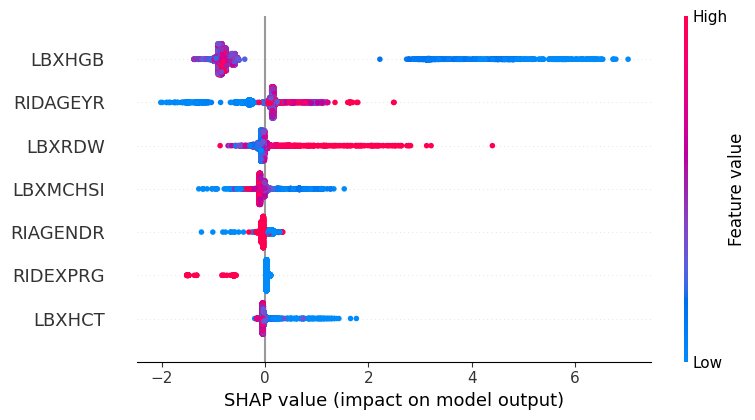

In [24]:
# Explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(loaded_gb_model)
shap_values = explainer.shap_values(X_test_scaled_selected)

# Summary plot
shap.summary_plot(shap_values, X_test_scaled_selected, feature_names=selected_features)


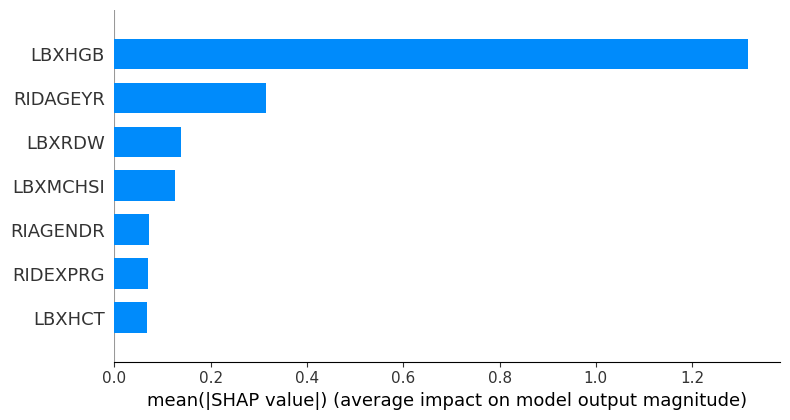

In [25]:
# Summary plot for feature importance
shap.summary_plot(shap_values,X_test_scaled_selected, feature_names=selected_features, plot_type='bar')
plt.show()

In [26]:
from imblearn.over_sampling import RandomOverSampler

In [27]:
ros = RandomOverSampler(random_state=42)

In [28]:
from collections import Counter
counter = Counter(y_train)
print(counter)

Counter({0: 15205, 1: 791})


In [29]:
X_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)

In [30]:
counter = Counter(y_train_resampled)
print(counter)

Counter({0: 15205, 1: 15205})


In [31]:
X_train_scaled_resampled = ss.fit_transform(X_train_resampled)
X_test_scaled = ss.transform(x_test)

In [32]:
gb = GradientBoostingClassifier(random_state=42)

In [33]:
gb.fit(X_train_scaled_resampled,y_train_resampled)

GradientBoostingClassifier(random_state=42)

In [34]:
y_pred = gb.predict(X_test_scaled)
y_prob = gb.predict_proba(X_test_scaled)[:,1]

cr = classification_report(y_test, y_pred, output_dict=True)
cm = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Create a PrettyTable for the classification report
report_table = PrettyTable()
report_table.field_names = ['Class', 'Precision', 'Recall', 'F1-Score', 'Support']
for class_name, metrics in cr.items():
    if class_name.isdigit():  # Skip non-numeric class names (if any)
        report_table.add_row([class_name,
                              metrics['precision'],
                              metrics['recall'],
                              metrics['f1-score'],
                              metrics['support']])

# Print results
print(f"Model: Gradient Boost with RandomOverSampling")
print(f"Confusion matrix:\n{cm}")
print("-" * 40)
print("Classification report:")
print(report_table)
print("-" * 40)
print(f"ROC AUC: {roc_auc:.2f}")
print(f"PR AUC: {pr_auc:.2f}")
print("-" * 40)
print(f"Accuracy :{accuracy}")
print(f"Precision :{precision}")
print(f"recall :{recall}")

Model: Gradient Boost with RandomOverSampling
Confusion matrix:
[[3670  121]
 [   4  204]]
----------------------------------------
Classification report:
+-------+--------------------+--------------------+--------------------+---------+
| Class |     Precision      |       Recall       |      F1-Score      | Support |
+-------+--------------------+--------------------+--------------------+---------+
|   0   | 0.9989112683723462 | 0.9680823001846478 | 0.9832551908908239 |   3791  |
|   1   | 0.6276923076923077 | 0.9807692307692307 | 0.7654784240150093 |   208   |
+-------+--------------------+--------------------+--------------------+---------+
----------------------------------------
ROC AUC: 0.99
PR AUC: 0.87
----------------------------------------
Accuracy :0.9687421855463866
Precision :0.6276923076923077
recall :0.9807692307692307


In [36]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=GradientBoostingClassifier(random_state=42),
              step=1, cv=5, scoring='average_precision', verbose=1,n_jobs=-1)
X_train_scaled_selected_ros = rfecv.fit_transform(X_train_resampled, y_train_resampled)

Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.


In [37]:
# Print the selected features
selected_features = X.columns[rfecv.support_]
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['RIAGENDR', 'RIDAGEYR', 'RIDEXPRG', 'LBDMONO', 'LBXHGB', 'LBXHCT',
       'LBXMCVSI', 'LBXMCHSI', 'LBXRDW'],
      dtype='object')


In [38]:
X_test_scaled_selected_ros = rfecv.transform(x_test)

In [39]:
gb.fit(X_train_scaled_selected_ros,y_train_resampled)

GradientBoostingClassifier(random_state=42)

In [40]:
import pickle
with open('gradient_boosting_model_with_oversampling.pkl', 'wb') as file:
    pickle.dump(gb, file)

In [41]:
import pickle

# Specify the path to your pickle file
pickle_file_path = 'gradient_boosting_model_with_oversampling.pkl'

# Load the model from the pickle file
with open(pickle_file_path, 'rb') as file:
    model = pickle.load(file)

In [42]:
# Make predictions
y_pred = model.predict(X_test_scaled_selected_ros)
y_prob = model.predict_proba(X_test_scaled_selected_ros)[:,1]

cr = classification_report(y_test, y_pred, output_dict=True)
cm = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Create a PrettyTable for the classification report
report_table = PrettyTable()
report_table.field_names = ['Class', 'Precision', 'Recall', 'F1-Score', 'Support']
for class_name, metrics in cr.items():
    if class_name.isdigit():  # Skip non-numeric class names (if any)
        report_table.add_row([class_name,
                              metrics['precision'],
                              metrics['recall'],
                              metrics['f1-score'],
                              metrics['support']])

# Print results
print(f"Model: Gradient Boost")
print(f"Confusion matrix:\n{cm}")
print("-" * 40)
print("Classification report:")
print(report_table)
print("-" * 40)
print(f"ROC AUC: {roc_auc:.2f}")
print(f"PR AUC: {pr_auc:.2f}")
print("-" * 40)
print(f"Accuracy :{accuracy}")
print(f"Precision :{precision}")
print(f"recall :{recall}")

Model: Gradient Boost
Confusion matrix:
[[3671  120]
 [   3  205]]
----------------------------------------
Classification report:
+-------+--------------------+--------------------+--------------------+---------+
| Class |     Precision      |       Recall       |      F1-Score      | Support |
+-------+--------------------+--------------------+--------------------+---------+
|   0   | 0.9991834512792597 | 0.9683460828277499 | 0.9835231078365706 |   3791  |
|   1   | 0.6307692307692307 | 0.9855769230769231 | 0.7692307692307692 |   208   |
+-------+--------------------+--------------------+--------------------+---------+
----------------------------------------
ROC AUC: 0.99
PR AUC: 0.86
----------------------------------------
Accuracy :0.9692423105776444
Precision :0.6307692307692307
recall :0.9855769230769231


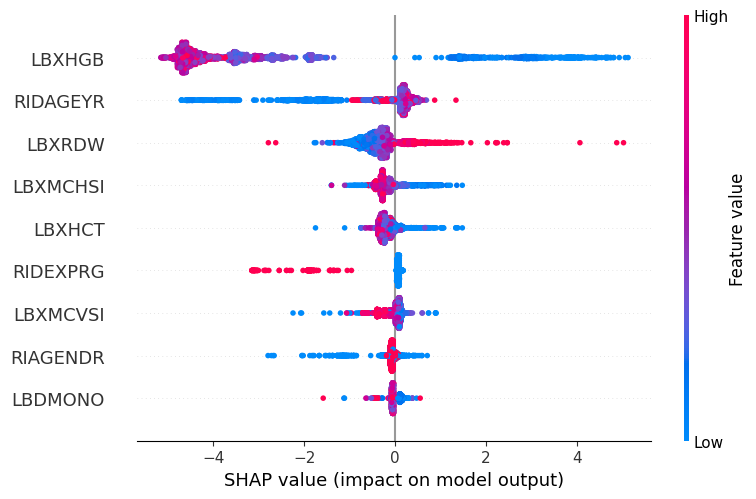

In [43]:
# Explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_scaled_selected_ros)

# Summary plot
shap.summary_plot(shap_values, X_test_scaled_selected_ros, feature_names=selected_features)

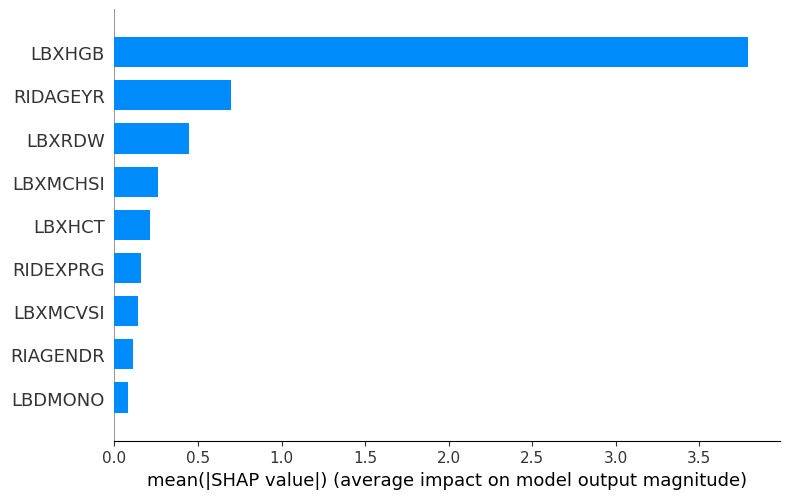

Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitt

In [44]:
# Summary plot for feature importance
shap.summary_plot(shap_values,X_test_scaled_selected_ros, feature_names=selected_features, plot_type='bar')
plt.show()

In [45]:
print(selected_features)

Index(['RIAGENDR', 'RIDAGEYR', 'RIDEXPRG', 'LBDMONO', 'LBXHGB', 'LBXHCT',
       'LBXMCVSI', 'LBXMCHSI', 'LBXRDW'],
      dtype='object')
